# Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset

In [3]:
dataset = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Data preprocessing

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
print('Number of persons analysed :', dataset.shape[0])
print('Number of factors :', dataset.shape[1])

Number of persons analysed : 253680
Number of factors : 22


## Check data imbalance

In [6]:
print('Number of unique values present to identify diabetes')
print(dataset['Diabetes_012'].value_counts())

Number of unique values present to identify diabetes
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


## Downsampling

In [7]:
downsampled_data = dataset.groupby('Diabetes_012').apply(lambda x: x.sample(4631))

In [8]:
print(downsampled_data)

                     Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  \
Diabetes_012                                                                   
0.0          158359           0.0     0.0       1.0        1.0  23.0     0.0   
             84913            0.0     1.0       0.0        1.0  29.0     0.0   
             6417             0.0     0.0       0.0        1.0  27.0     0.0   
             245774           0.0     0.0       0.0        1.0  21.0     0.0   
             59863            0.0     0.0       0.0        1.0  36.0     1.0   
...                           ...     ...       ...        ...   ...     ...   
2.0          215119           2.0     1.0       1.0        1.0  28.0     1.0   
             166986           2.0     1.0       0.0        1.0  23.0     0.0   
             75848            2.0     1.0       1.0        1.0  31.0     0.0   
             173497           2.0     0.0       0.0        1.0  29.0     1.0   
             29756            2.0     1.

In [9]:
downsampled_data = downsampled_data.reset_index(drop=True)

In [10]:
print(downsampled_data)

       Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0               0.0     0.0       1.0        1.0  23.0     0.0     0.0   
1               0.0     1.0       0.0        1.0  29.0     0.0     0.0   
2               0.0     0.0       0.0        1.0  27.0     0.0     0.0   
3               0.0     0.0       0.0        1.0  21.0     0.0     0.0   
4               0.0     0.0       0.0        1.0  36.0     1.0     0.0   
...             ...     ...       ...        ...   ...     ...     ...   
13888           2.0     1.0       1.0        1.0  28.0     1.0     0.0   
13889           2.0     1.0       0.0        1.0  23.0     0.0     0.0   
13890           2.0     1.0       1.0        1.0  31.0     0.0     0.0   
13891           2.0     0.0       0.0        1.0  29.0     1.0     0.0   
13892           2.0     1.0       0.0        1.0  25.0     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                       0.0           

In [11]:
print(downsampled_data['Diabetes_012'].value_counts())

Diabetes_012
0.0    4631
1.0    4631
2.0    4631
Name: count, dtype: int64


# Classification

## Data split

In [12]:
X = downsampled_data.iloc[:, 1:]
y = downsampled_data.iloc[:, 0]

In [13]:
print(X)

       HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0         0.0       1.0        1.0  23.0     0.0     0.0   
1         1.0       0.0        1.0  29.0     0.0     0.0   
2         0.0       0.0        1.0  27.0     0.0     0.0   
3         0.0       0.0        1.0  21.0     0.0     0.0   
4         0.0       0.0        1.0  36.0     1.0     0.0   
...       ...       ...        ...   ...     ...     ...   
13888     1.0       1.0        1.0  28.0     1.0     0.0   
13889     1.0       0.0        1.0  23.0     0.0     0.0   
13890     1.0       1.0        1.0  31.0     0.0     0.0   
13891     0.0       0.0        1.0  29.0     1.0     0.0   
13892     1.0       0.0        1.0  25.0     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                       0.0           1.0     1.0      1.0  ...   
1                       0.0           1.0     1.0      1.0  ...   
2                       0.0           1.0     0.0      1.0  ...   
3          

In [14]:
print(y)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
13888    2.0
13889    2.0
13890    2.0
13891    2.0
13892    2.0
Name: Diabetes_012, Length: 13893, dtype: float64


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
print(X_train)

       HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
5753      0.0       1.0        1.0  23.0     0.0     0.0   
9135      1.0       1.0        1.0  36.0     0.0     0.0   
9381      0.0       1.0        1.0  34.0     1.0     0.0   
12965     1.0       1.0        1.0  31.0     1.0     0.0   
6681      0.0       1.0        1.0  35.0     1.0     0.0   
...       ...       ...        ...   ...     ...     ...   
13123     1.0       1.0        1.0  29.0     0.0     0.0   
3264      1.0       0.0        1.0  46.0     1.0     0.0   
9845      1.0       1.0        1.0  27.0     1.0     0.0   
10799     1.0       0.0        1.0  22.0     0.0     0.0   
2732      1.0       1.0        1.0  27.0     1.0     1.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
5753                    1.0           1.0     1.0      1.0  ...   
9135                    0.0           1.0     1.0      1.0  ...   
9381                    0.0           0.0     1.0      1.0  ...   
12965      

In [17]:
print(y_train)

5753     1.0
9135     1.0
9381     2.0
12965    2.0
6681     1.0
        ... 
13123    2.0
3264     0.0
9845     2.0
10799    2.0
2732     0.0
Name: Diabetes_012, Length: 11114, dtype: float64


In [18]:
print(X_test)

      HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
2818     0.0       1.0        1.0  23.0     0.0     0.0                   0.0   
9003     1.0       1.0        1.0  34.0     1.0     0.0                   0.0   
6481     1.0       0.0        1.0  36.0     0.0     0.0                   0.0   
5193     1.0       1.0        1.0  28.0     0.0     0.0                   0.0   
7028     1.0       0.0        1.0  25.0     0.0     0.0                   0.0   
...      ...       ...        ...   ...     ...     ...                   ...   
8133     1.0       0.0        1.0  24.0     0.0     0.0                   0.0   
6978     1.0       1.0        1.0  31.0     0.0     0.0                   0.0   
8783     1.0       0.0        1.0  33.0     0.0     0.0                   0.0   
6789     0.0       0.0        1.0  22.0     0.0     0.0                   0.0   
6878     1.0       0.0        1.0  44.0     0.0     0.0                   0.0   

      PhysActivity  Fruits 

In [19]:
print(y_test)

2818    0.0
9003    1.0
6481    1.0
5193    1.0
7028    1.0
       ... 
8133    1.0
6978    1.0
8783    1.0
6789    1.0
6878    1.0
Name: Diabetes_012, Length: 2779, dtype: float64


# Decision tree classification

In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Predict test result

In [21]:
y_pred = classifier.predict(X_test)

# Confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[432 246 206]
 [281 327 317]
 [240 344 386]]


0.4120187117668226

# Data visualisation

Text(0.5, 1.0, 'Confusion Matrix')

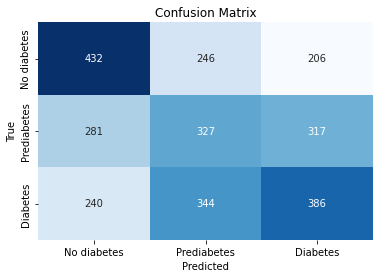

In [23]:
custom_labels = ['No diabetes', 'Prediabetes', 'Diabetes']
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Feature ranking

In [24]:
feature_importances = classifier.feature_importances_

In [25]:
print(feature_importances)

[0.04827387 0.01602221 0.00562316 0.16546583 0.03634194 0.00968917
 0.02353039 0.02927511 0.03666506 0.02347749 0.00758636 0.00777413
 0.01695281 0.05561121 0.06976678 0.08411865 0.02221035 0.03742334
 0.12363212 0.07680553 0.1037545 ]


In [26]:
column_names = np.array(list(X.columns))
sorted_indices = np.argsort(feature_importances)[::-1]
print("Feature ranking:")
for f in range(len(feature_importances)):
    print(f"{f + 1}. {column_names[sorted_indices[f]]} - Importance: {feature_importances[sorted_indices[f]]}")

Feature ranking:
1. BMI - Importance: 0.1654658336128414
2. Age - Importance: 0.12363211652094222
3. Income - Importance: 0.1037545019062957
4. PhysHlth - Importance: 0.08411864621160815
5. Education - Importance: 0.07680553410551763
6. MentHlth - Importance: 0.06976677954973745
7. GenHlth - Importance: 0.05561121234563771
8. HighBP - Importance: 0.04827386785594447
9. Sex - Importance: 0.037423337845851036
10. Fruits - Importance: 0.03666505649508608
11. Smoker - Importance: 0.03634193771095374
12. PhysActivity - Importance: 0.029275108467608193
13. HeartDiseaseorAttack - Importance: 0.023530394625292425
14. Veggies - Importance: 0.02347748703808753
15. DiffWalk - Importance: 0.022210353321692584
16. NoDocbcCost - Importance: 0.016952808198226837
17. HighChol - Importance: 0.016022209097892447
18. Stroke - Importance: 0.00968916576413081
19. AnyHealthcare - Importance: 0.007774134238314029
20. HvyAlcoholConsump - Importance: 0.007586356034969783
21. CholCheck - Importance: 0.005623159

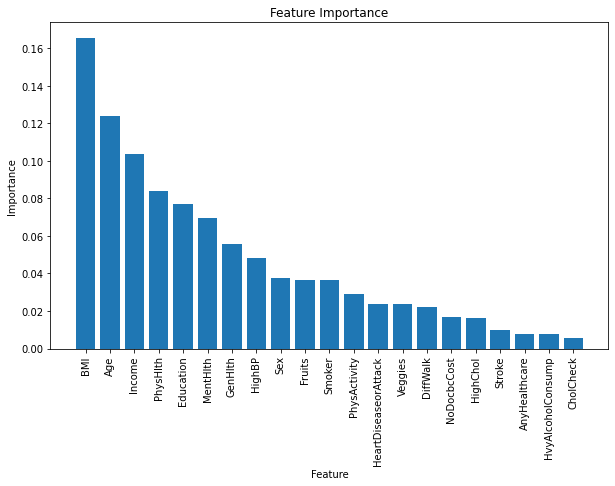

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(column_names[sorted_indices], feature_importances[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()